# Estrutura de Dados — Grafos

Capítulos 22, 23, 24 e 25 do livro texto sugerido: Introduction to Algorithms, Fourth Edition By Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest and Clifford Stein https://mitpress.mit.edu/9780262046305/introduction-to-algorithms/

## Aviso

Recomenda-se olhar este caderno através do Google Colab, que não renderiza a saída em HTML do exemplo ao final.

https://colab.research.google.com/github/Gabrielcarvfer/Estrutura-de-dados-UnB/blob/master/09_grafos.ipynb


## Conteúdo

Assim como árvores, grafos permitem a modelagem de problemas mais complexos.

São formados por conjuntos de vértices e arestas, que podem ou não ser direcionadas.

As arestas tipicamente recebem pesos, utilizadas para representar o custo de tomar diferentes caminhos.

É largamente utilizado em problemas de otimização.

Alguns dos casos de uso clássicos incluem:
 - minimização de rotas transportes de pessoas e carga;
 - maximização da vazão ou minimização da latência entre redes de computadores;
 - alocação de recursos escassos.

Veremos a seguir como implementar um grafo.

In [1]:
class Vertice:
    def __init__(self, nome):
        self.nome = nome
        self.arestas = []

    def adicionar_aresta_unidirecional(self, novo_vertice, peso):
        self.arestas.append((novo_vertice, peso))

    def adicionar_aresta_bidirecional(self, novo_vertice, peso):
        self.arestas.append((novo_vertice, peso))
        novo_vertice.adicionar_aresta_unidirecional(self, peso)
    
    def apagar_aresta(self, vertice):
        for (verticeConectado, distancia) in self.arestas:
            if verticeConectado == vertice:
                self.arestas.remove((verticeConectado, distancia))
                verticeConectado.apagar_aresta(self)
                break
                
    def apagar_arestas(self):
        for (vertice, peso) in self.arestas:
            for verticeTuple in vertice.arestas:
                if verticeTuple[0] == self:
                    vertice.arestas.remove(verticeTuple)
        del self

    def __str__(self):
        return self.nome
    
    def __lt__(self, other):
        return self.nome < other.nome

Podemos criar vértices representando diferentes objetos de trabalho.

Um exemplo dado anteriormente, foi o de aeroportos pelo Brasil.

In [2]:
# Belém (Val-de-cans) e
bel = Vertice("BEL")

# Brasília (Juscelino Kubitscheck)
bsb = Vertice("BSB")

# Belo Horizonte (Confins)
cnf = Vertice("CNF")

# São Paulo (Guarulhos)
gru = Vertice("GRU")

# Goiânia
gyn = Vertice("GYN")

# Ribeirão Preto
rao = Vertice("RAO")

# Rio de Janeiro (Galeão)
gig = Vertice("GIG")

Com os vértices feitos, podemos adicionar arestas conectando estes vértices.

Os vértices podem ser unidirecionais (A->B, mas não A<-B) ou bidirecionais (A->B e A<-B).

Como tratamos de aeroportos, temos arestas bidirecionais.

Tipicamente, as arestas têm algum peso associado.

No caso de rotas de vôo, o peso das arestas pode ser a distância dos aeroportos em quilômetros.

In [3]:
# Rota Belém<->Brasília
bel.adicionar_aresta_bidirecional(bsb, 1600)
print("Rotas saindo/chegando a Belém:",
      list(map(lambda x: x[0].nome, bel.arestas))) # imprimirá: ['BSB']
print("Rotas saindo/chegando a Brasília:",
      list(map(lambda x: x[0].nome, bsb.arestas))) # imprimirá: ['BEL']

Rotas saindo/chegando a Belém: ['BSB']
Rotas saindo/chegando a Brasília: ['BEL']


Continuamos adicionando rotas entre os vértices do nosso grafo.

In [4]:
# Rota Belém<->Confins
bel.adicionar_aresta_bidirecional(cnf, 2100)
# Rota Belém<->Guarulhos
bel.adicionar_aresta_bidirecional(gru, 2472)

# Rota Brasília<->Confins
bsb.adicionar_aresta_bidirecional(cnf, 618)
# Rota Brasília<->Guarulhos
bsb.adicionar_aresta_bidirecional(gru, 876)

# Rota Goiânia<->Brasília
gyn.adicionar_aresta_bidirecional(bsb, 180)
# Rota Goiânia<->Confins
gyn.adicionar_aresta_bidirecional(cnf, 660)
# Rota Goiânia<->Guarulhos
gyn.adicionar_aresta_bidirecional(gru, 800)

# Rota Ribeirão Preto<->Brasília
rao.adicionar_aresta_bidirecional(bsb, 600)
# Rota Ribeirão Preto<->Confins
rao.adicionar_aresta_bidirecional(cnf, 426)
# Rota Ribeirão Preto<->Goiânia
rao.adicionar_aresta_bidirecional(gyn, 522)
# Rota Ribeirão Preto<->Guarulhos
rao.adicionar_aresta_bidirecional(gru, 290)

# Rota Ribeirão Preto<->Guarulhos
gig.adicionar_aresta_bidirecional(gru, 360)
# Rota Ribeirão Preto<->Brasília
gig.adicionar_aresta_bidirecional(bsb, 936)
# Rota Ribeirão Preto<->Confins
gig.adicionar_aresta_bidirecional(cnf, 340)

print("Rotas saindo/chegando ao Rio de Janeiro:",
      list(map(lambda x: x[0].nome, gig.arestas))) # imprimirá ['GRU', 'BSB', 'CNF', 'GRU', 'BSB', 'CNF']

grafo = [bel, bsb, cnf, gig, gru, gyn, rao]

Rotas saindo/chegando ao Rio de Janeiro: ['GRU', 'BSB', 'CNF']


Mas é difícil de entender o grafo sem visualizá-lo. Portanto, vamos plotar nosso grafo.

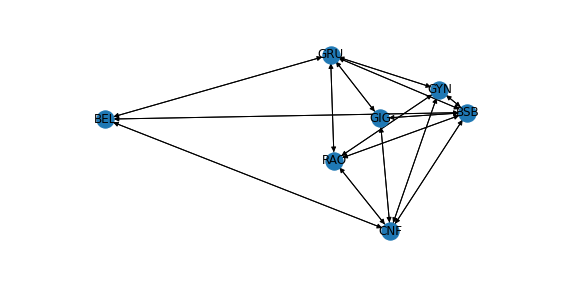

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

def plota_grafo_layout_graphviz(lista_vertices: list, cor_vertices:list = None):
    _, _ = plt.subplots(figsize=(10,5))
    # Transforma nosso grafo em grafo networkx para plotagem
    G = nx.DiGraph()
    for vertice in lista_vertices:
        G.add_node(vertice, label=vertice.nome)
    for vertice in lista_vertices:
        for (noDestino, peso) in vertice.arestas:
            G.add_edge(vertice, noDestino, len=peso)

    pos = nx.nx_agraph.graphviz_layout(G)
    # Desenha grafo e plota
    if cor_vertices is None:
        nx.draw_networkx(G, pos)
    else:
        nx.draw_networkx_nodes(G, pos, node_color=cor_vertices)
        nx.draw_networkx_labels(G, pos)
        nx.draw_networkx_edges(G, pos)
    #nx.draw_networkx_edge_labels(G, pos)
    axes = plt.gca()
    axes.margins(0.20)
    plt.axis("off")
    plt.show()

plota_grafo_layout_graphviz(grafo)

Temos então uma visualização do nosso grafo.

Uma grande droga de layout, que não é representativa dos pesos (comprimento) das aresta.

Podemos fazer melhor! Usando métodos iterativos.

Antes de implementar o método iterativo, uma breve pausa para o código que animará o processo.

In [6]:
historico_coordenadas = []
def animar_iteracoes():
    global historico_coordenadas

    # Salva uma cópia do histórico de coordenadas e limpa a lista global
    historico_coordenadas_copia = historico_coordenadas
    historico_coordenadas = []
    
    # Consolidar movimentações de múltiplos nós em um mesmo quadro para animação
    listas_por_vertices = []
    for vertice in historico_coordenadas_copia[0]:
        listas_por_vertices.append(list(filter(lambda x: x[vertice] if vertice in x.keys() else None, historico_coordenadas_copia[1:])))
    historico_coordenadas_copia = []
    for coordenadas in zip(*listas_por_vertices):
        historico_coordenadas_copia.append({})
        for coordenada in coordenadas:
            historico_coordenadas_copia[-1].update(coordenada)

    # Anima coordenadas
    from matplotlib.animation import FuncAnimation
    from IPython.display import HTML

    fig = plt.figure()
    plots = {}
    def init():
        # Inicializa pontos relativos às coordenadas
        for (vertice, coordenada) in historico_coordenadas_copia[0].items():
            plots[vertice] = plt.scatter(*coordenada, label=vertice)

        # Determina limites da animação
        x_limite = [0,0]
        y_limite = [0,0]
        for i in range(len(historico_coordenadas_copia)):
            for (vertice, coordenada) in historico_coordenadas_copia[i].items():
                if coordenada[0] < x_limite[0]:
                    x_limite[0] = coordenada[0]
                if coordenada[0] > x_limite[1]:
                    x_limite[1] = coordenada[0]
                if coordenada[1] < y_limite[0]:
                    y_limite[0] = coordenada[1]
                if coordenada[1] > y_limite[1]:
                    y_limite[1] = coordenada[1]

        # Adiciona margem para limites
        x_limite[0] -= 1
        y_limite[0] -= 1
        x_limite[1] += 1
        y_limite[1] += 1

        # Seta limites
        plt.xlim(x_limite)
        plt.ylim(y_limite)

    def animate(i):
        for (vertice, coordenada) in historico_coordenadas_copia[i*10].items():
            plots[vertice].set_offsets(coordenada)

    # Anima histórico de coordenadas
    anim = FuncAnimation(fig, animate, init_func=init,
                         frames = len(historico_coordenadas_copia)//10,
                         interval = 100, repeat=True)

    # Mostra animação iterativa
    display(HTML(anim.to_jshtml()))

    # Previne a plotagem de imagem estática ao final da animação
    plt.close()
    return

Agora sim, podemos desenvolver nosso layout com coordenadas aproximadas iterativamente, utilizando técnica de aprendizado de máquina chamada descida em gradiente.

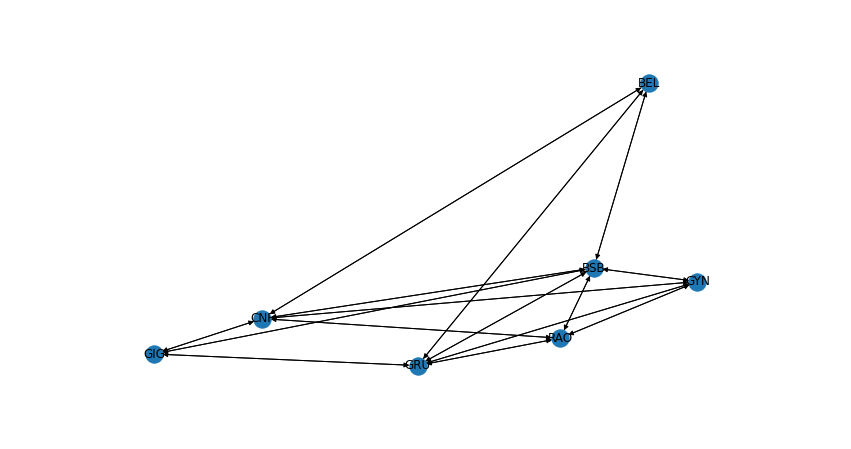

In [7]:
import random

def plota_grafo_layout_iterativo(lista_vertices: list):
    global historico_coordenadas
    _, _ = plt.subplots(figsize=(15,8))
    # Transforma nosso grafo em grafo networkx para plotagem
    G = nx.DiGraph()
    historico_coordenadas = [{}]
    pos = {}
    for vertice in lista_vertices:
        G.add_node(vertice, label=vertice.nome)
        historico_coordenadas[-1][vertice.nome] = ((0), (0))
        pos[vertice.nome] = [0, 0]

    for vertice in lista_vertices:
        for (vertice_destino, peso) in vertice.arestas:
            G.add_edge(vertice, vertice_destino, len=peso)
            
    def distancia_euclidiana(pos1, pos2):
        return ((pos1[0]-pos2[0])**2 + (pos1[1]-pos2[1])**2)**0.5

    def erro_acumulado_arestas(vertice, pos, pos_vertice=None):
        erro_acumulado = 0
        if pos_vertice is None:
            pos_vertice = pos[vertice.nome]
        for (vertice_destino, peso) in vertice.arestas:
            dist = distancia_euclidiana(pos_vertice, pos[vertice_destino.nome])
            erro_acumulado += abs(peso - dist)
        return erro_acumulado

    # Por força bruta, tentaremos aproximar as coordenadas
    # que melhor ajustam as distâncias entre os nós em 100 passos
    for passo in range(300):
        # Para cada vértice
        for vertice in lista_vertices:
            erro_original = erro_acumulado_arestas(vertice, pos)
            # Chuta coordenadas aleatórias até achar uma que tenha erro menor que o atual
            lr = 0.10
            iteracao_mal_sucedida = 0
            while erro_original > 10 and lr < 1:
                # Fazemos a descida em gradiente para encontrar a coordenada
                # que produz o menor erro global
                erro_lr = int(erro_original*lr)
                nova_coordenada = list(pos[vertice.nome])
                nova_coordenada[0] += random.randint(-erro_lr, erro_lr)
                nova_coordenada[1] += random.randint(-erro_lr, erro_lr)
                novo_erro = erro_acumulado_arestas(vertice, pos, nova_coordenada)
                if novo_erro < erro_original:
                    pos[vertice.nome] = nova_coordenada
                    break

                # Caso a descida em gradiente não seja bem sucedida,
                # incremente a taxa de aprendizado, para aumentar
                # o intervalo de coordenadas possíveis e possivelmente
                # sairá de um vale com mínimo local em direção ao mínimo global
                iteracao_mal_sucedida += 1
                if iteracao_mal_sucedida % 10 == 0:
                    lr *= 1.01
            historico_coordenadas.append({vertice.nome: ((pos[vertice.nome][0]), (pos[vertice.nome][1]))})

    # Transforma chaves do dicionário em vértices de G
    pos = dict(zip(G.nodes, pos.values()))

    # Desenha grafo e plota
    nx.draw_networkx(G, pos)
    #nx.draw_networkx_edge_labels(G, pos)
    axes = plt.gca()
    axes.margins(0.20)
    plt.axis("off")
    plt.show()

plota_grafo_layout_iterativo(grafo)

Os tamanhos das arestas fazem sentido, porém pode ocorrer da topologia ficar espelhada horizontalmente e/ou verticalmente, ou rotacionada no espaço.

Abaixo, nós temos as animações com as iterações até chegarmos nas coordenadas finais que melhor aproximam as distâncias das arestas entre os vértices.

In [8]:
animar_iteracoes()

Agora que temos um layout decente da nossa topologia, podemos focar novamente em grafos.

### Como operar em grafos?

Grafos, assim como árvores, são compostas por referências para outros elementos (vértices no caso de grafos, nó no caso de árvores).

Assim como em árvores, podem ser utiliados métodos iterativos ou recursivos para realizar operações com grafos.

Uma das atividades mais comuns com grafos é a busca da rota mais curta entre dois vértices específicos.

Já vimos isto durante as aulas sobre recursão.

In [9]:
def busca_rota_mais_curta (vertice_partida, vertice_destino, distancia_visitada=0, vertices_visitados=None):
    # Esta é uma função recursiva
    if vertices_visitados is None:
        vertices_visitados = [vertice_partida]

    # A condição de parada é quando o vértice de destino já está na rota,
    # o que significa que chegamos ao destino usando a rota descrita pelos
    # vértices visitados
    if vertice_destino in vertices_visitados:
        return distancia_visitada, vertices_visitados

    distanciaRotaMaisCurta = 99999999999999 # distância absurda, que certamente será maior que um caminho válido
    rotaMaisCurta = None

    # Para cada vértice conectado ao ponto de partida, explore os vértices conectados
    for (verticeEscala, distancia) in vertice_partida.arestas:
        # Não faça duas escalas numa mesma cidade
        if verticeEscala in vertices_visitados:
            continue
        # Busca a menor rota entre o vértice de escala e o destino
        distancia_nova_rota, nova_rota = busca_rota_mais_curta(verticeEscala,
                                                         vertice_destino,
                                                         distancia_visitada+distancia,
                                                         [*vertices_visitados, verticeEscala])
        # Pegue sempre a rota mais curta
        if distancia_nova_rota < distanciaRotaMaisCurta:
            distanciaRotaMaisCurta = distancia_nova_rota
            rotaMaisCurta = nova_rota

    # Retorne as rotas parciais mais curtas
    return distanciaRotaMaisCurta, rotaMaisCurta

Na busca acima, visitaremos recursivamente os vértices que compõe os subgrafos que formam rotas sem ciclos até o destino.

A inexistência de ciclos é garantida pela primeira condição de parada, onde não continuamos explorando os vizinhos de um vértice já visitado. Neste caso, a lista de vértices visitados é passada pela função chamadora.

```
if vertice_destino in vertices_visitados:
        return distancia_visitada, vertices_visitados
```

Após isto, chamamos recursivamente, para cada um dos vértices (`verticeEscala`) conectado por das arestas ao vértice atual (`vérticePartida`), a mesma função de buscar a rota mais curta.

```
distancia_nova_rota, nova_rota = busca_rota_mais_curta(verticeEscala,
                                                 vertice_destino,
                                                 distancia_visitada+distancia,
                                                 [*vertices_visitados, verticeEscala])
```

Note que após isto, comparamos se a nova rota é menor que a rota mais curta conhecida.

```
if distancia_nova_rota < distanciaRotaMaisCurta:
            distanciaRotaMaisCurta = distancia_nova_rota
            rotaMaisCurta = nova_rota
```

Isto permite que dentre as rotas possíveis saindo de um vértice, sempre peguemos a rota mais curta até o vértice de destino.

In [10]:
distancia, rota = busca_rota_mais_curta(bel, gru)
print("Rota mais curta entre Belém e Guarulhos:%d km passando por %s" % (distancia, list(map(lambda x: x.nome, rota))))

Rota mais curta entre Belém e Guarulhos:2472 km passando por ['BEL', 'GRU']


Como resolvemos isto programaticamente, podemos remover conexões (arestas) e recalcular o caminho mais curto.

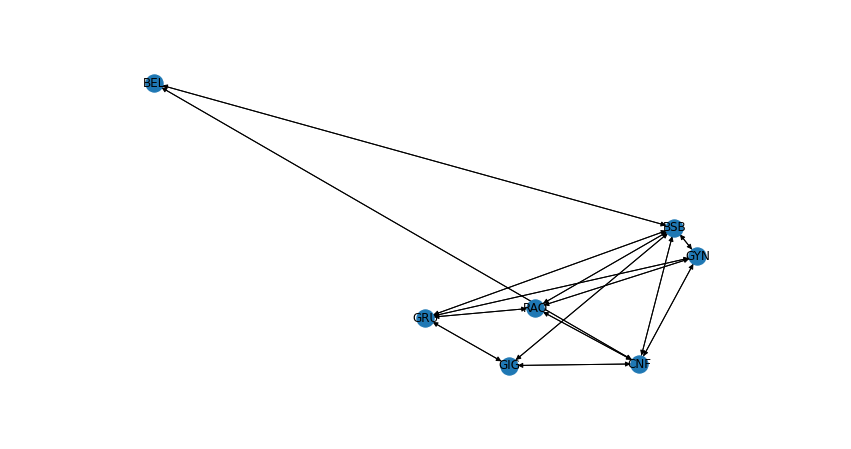

Rota mais curta entre Belém e Guarulhos:2476 km passando por ['BEL', 'BSB', 'GRU']


In [11]:
gru.apagar_aresta(bel)
plota_grafo_layout_iterativo(grafo)
distancia, rota = busca_rota_mais_curta(bel, gru)
print("Rota mais curta entre Belém e Guarulhos:%d km passando por %s" % (distancia, list(map(lambda x: x.nome, rota))))

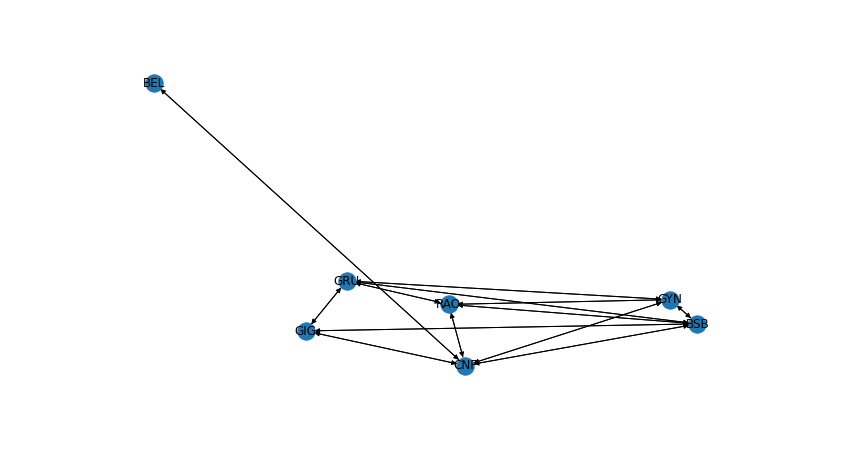

Rota mais curta entre Belém e Guarulhos:2800 km passando por ['BEL', 'CNF', 'GIG', 'GRU']


In [12]:
bsb.apagar_aresta(bel)
plota_grafo_layout_iterativo(grafo)
distancia, rota = busca_rota_mais_curta(bel, gru)
print("Rota mais curta entre Belém e Guarulhos:%d km passando por %s" % (distancia, list(map(lambda x: x.nome, rota))))

Quando removemos todas as rotas possíveis, a busca falha, retornando uma distância infinita (ou muito grande).

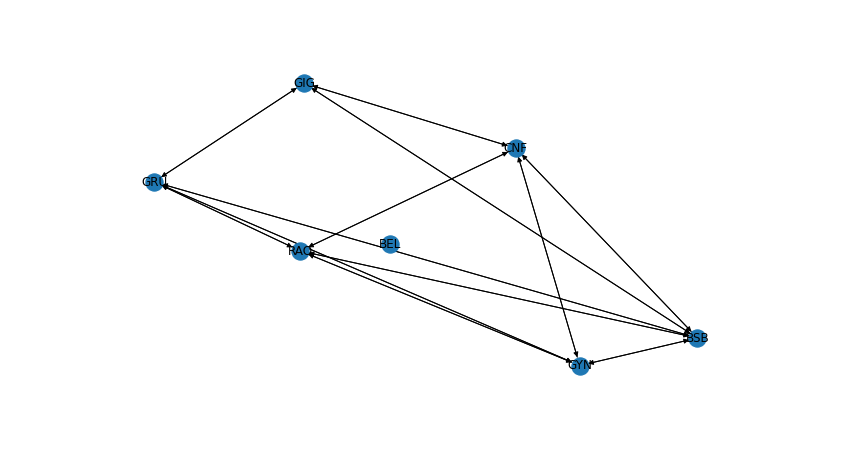

Rota mais curta entre Belém e Guarulhos:99999999999999 km passando por None


In [13]:
cnf.apagar_aresta(bel)
plota_grafo_layout_iterativo(grafo)
distancia, rota = busca_rota_mais_curta(bel, gru)
print("Rota mais curta entre Belém e Guarulhos:%d km passando por %s" % (distancia, rota))

A busca feita acima é conhecida como busca em profundidade, onde se explora um caminho inteiro, antes de visitar caminhos alternativos.

Porém, existe também a busca em largura, onde são visitados todos os vértices vizinhos do atualmente explorado são adicionados a uma lista. Desta lista, visitam-se cada um dos vértices, até que todos os vizinhos de todos os vértices sejam visitados ao menos uma vez.

In [14]:
def busca_rota_mais_curta_em_largura (vertice_partida, vertice_destino):
    # Esta não é uma função recursiva
    # Guardaremos um dicionário contendo as rotas da raiz até o nó
    caminhos = { vertice_partida.nome : []}
    vertices_visitados = []
    vertices_visitados.append(vertice_partida)
    def calcula_peso_caminho(vertices):
        peso_caminho = 0
        for i, vertice in enumerate(vertices[:-1]):
            proximo_vertice, peso = list(filter(lambda x: x[0] == vertices[i+1], vertice.arestas))[0]
            peso_caminho += peso
        return peso_caminho

    # Enquanto houverem nós ainda não visitados, os visite
    while len(vertices_visitados) > 0:
        # Para cada novo vértice, existe um caminho desde 
        # o vértice de partida que já foi explorado
        novo_caminho = list(caminhos[vertices_visitados[0].nome])
        # e que é acrescido do vértice atual
        novo_caminho += [vertices_visitados[0]]
        
        # Em seguida, se exploram seus vizinhos
        for (vizinho, peso) in vertices_visitados[0].arestas:
            if vizinho.nome not in caminhos:
                # O caminho até cada um dos vizinhos é guardado
                caminhos[vizinho.nome] = novo_caminho
                vertices_visitados.append(vizinho)
            else:
                # Se o vizinho já foi explorado, o caminho até a raíz
                # só pode ser trocado caso o novo caminho seja menor que o conhecido
                if calcula_peso_caminho(novo_caminho) < calcula_peso_caminho(caminhos[vizinho.nome]):
                    caminhos[vizinho.nome] = novo_caminho
        # Ao final de cada visita aos vértices, eles são retirados da fila
        # e seus vizinhos são então explorados
        vertices_visitados.pop(0)
    # Caso haja um caminho até o nó de destino, acrescente 
    # o nó de destino e calcule a distância até a raiz
    if vertice_destino.nome in caminhos:
        caminhos[vertice_destino.nome].append(vertice_destino)
        return calcula_peso_caminho(caminhos[vertice_destino.nome]), \
            list(map(lambda x: x.nome, caminhos[vertice_destino.nome]))
    else:
        # Caso não existe, retorne uma distância absurda e nenhum caminho
        return 99999999999999, None                              

In [15]:
distancia, rota = busca_rota_mais_curta(bel, gru)
print("Rota mais curta entre Belém e Guarulhos:%d km passando por %s" % (distancia, rota))
distancia, rota = busca_rota_mais_curta_em_largura(bel, gru)
print("Rota mais curta entre Belém e Guarulhos:%d km passando por %s" % (distancia, rota))
print("================================================================")
distancia, rota = busca_rota_mais_curta(rao, gig)
print("Rota mais curta entre Ribeirão Preto e Rio de Janeiro:%d km passando por %s" % (distancia, list(map(lambda x: x.nome, rota))))
distancia, rota = busca_rota_mais_curta_em_largura(rao, gig)
print("Rota mais curta entre Ribeirão Preto e Rio de Janeiro:%d km passando por %s" % (distancia, rota))   

Rota mais curta entre Belém e Guarulhos:99999999999999 km passando por None
Rota mais curta entre Belém e Guarulhos:99999999999999 km passando por None
Rota mais curta entre Ribeirão Preto e Rio de Janeiro:650 km passando por ['RAO', 'GRU', 'GIG']
Rota mais curta entre Ribeirão Preto e Rio de Janeiro:650 km passando por ['RAO', 'GRU', 'GIG']


### Busca por ciclos

Uma atividade comum com grafos é buscar ciclos. Ciclos são caminhos que saem de um nó, e retornam para ele.

Ciclos são formados naturalmente pelas diversas aplicações que usam grafos, e tipicamente devem ser evitados por algoritmos que buscam rotas.

Além disto, alguns algoritmos clássicos para grafos requerem que o grafo seja acíclico, ou seja, sem ciclos.

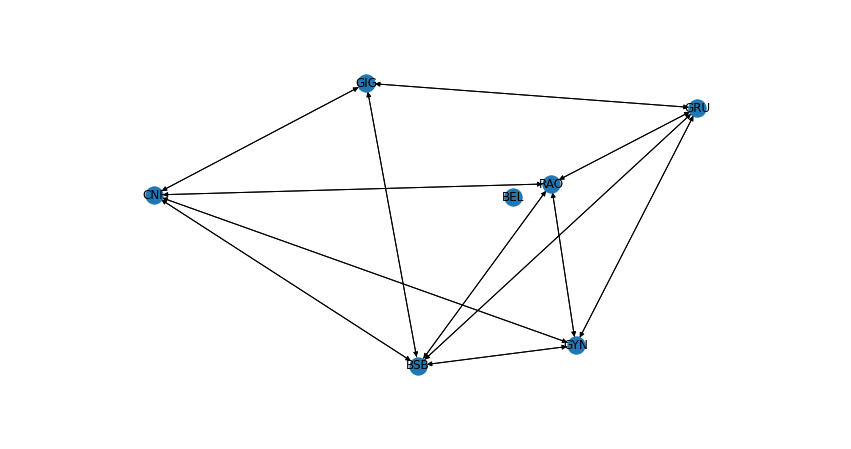

In [16]:
plota_grafo_layout_iterativo(grafo)

In [17]:
def busca_ciclo_vertice_recursivo(caminhoParcial: list = []):
    # Se não tiver nenhum vértice, para execução
    if len(caminhoParcial) < 1:
        return None
    # Checa se o vértice de partida aparece mais de uma vez no caminho atual
    if caminhoParcial.count(caminhoParcial[0]) > 1:
        # Se sim, achamos um ciclo
        return [caminhoParcial]
    # Checa se o vértice mais recente aparece mais de uma vez no caminho atual 
    if caminhoParcial.count(caminhoParcial[-1]) > 1:
        # Se sim, achamos outro ciclo, mas não do vértice que queríamos
        return []
    # Agrupa uma lista de caminhos com ciclos saindo do vértice mais recente
    caminhos = []
    for (vertice, peso) in caminhoParcial[-1].arestas:
        # Não volte diretamente por um nó que acabou de ser visitado
        if len(caminhoParcial) > 1 \
            and vertice == caminhoParcial[-2]:
            continue
        caminhosVisitados = busca_ciclo_vertice_recursivo(caminhoParcial+[vertice])
        caminhos.extend(caminhosVisitados)
    return caminhos

# Removemos todas as rotas para belém, portanto não teremos nada
print("Rotas com ciclos para Belém:", busca_ciclo_vertice_recursivo([bel]))

# Já para Brasília, temos vários ciclos possíveis
rotas = busca_ciclo_vertice_recursivo([bsb])
rotas = list(map(lambda x: [v.nome for v in x], rotas))
print("Rotas com ciclos para Brasília:", rotas)

Rotas com ciclos para Belém: []
Rotas com ciclos para Brasília: [['BSB', 'CNF', 'GYN', 'BSB'], ['BSB', 'CNF', 'GYN', 'GRU', 'BSB'], ['BSB', 'CNF', 'GYN', 'GRU', 'RAO', 'BSB'], ['BSB', 'CNF', 'GYN', 'GRU', 'GIG', 'BSB'], ['BSB', 'CNF', 'GYN', 'RAO', 'BSB'], ['BSB', 'CNF', 'GYN', 'RAO', 'GRU', 'BSB'], ['BSB', 'CNF', 'GYN', 'RAO', 'GRU', 'GIG', 'BSB'], ['BSB', 'CNF', 'RAO', 'BSB'], ['BSB', 'CNF', 'RAO', 'GYN', 'BSB'], ['BSB', 'CNF', 'RAO', 'GYN', 'GRU', 'BSB'], ['BSB', 'CNF', 'RAO', 'GYN', 'GRU', 'GIG', 'BSB'], ['BSB', 'CNF', 'RAO', 'GRU', 'BSB'], ['BSB', 'CNF', 'RAO', 'GRU', 'GYN', 'BSB'], ['BSB', 'CNF', 'RAO', 'GRU', 'GIG', 'BSB'], ['BSB', 'CNF', 'GIG', 'GRU', 'BSB'], ['BSB', 'CNF', 'GIG', 'GRU', 'GYN', 'BSB'], ['BSB', 'CNF', 'GIG', 'GRU', 'GYN', 'RAO', 'BSB'], ['BSB', 'CNF', 'GIG', 'GRU', 'RAO', 'BSB'], ['BSB', 'CNF', 'GIG', 'GRU', 'RAO', 'GYN', 'BSB'], ['BSB', 'CNF', 'GIG', 'BSB'], ['BSB', 'GRU', 'GYN', 'BSB'], ['BSB', 'GRU', 'GYN', 'CNF', 'BSB'], ['BSB', 'GRU', 'GYN', 'CNF', 'RAO', '

Agora que sabemos encontrar ciclos, podemos descobrir se um grafo é acíclico ou não checando cada um dos vértices para ciclos.

In [18]:
def grafo_aciclico(grafo: list):
    ciclos = []
    for vertice in grafo:
        ciclos.extend(busca_ciclo_vertice_recursivo([vertice]))
    
    eh_aciclico = len(ciclos) == 0
    return eh_aciclico

print("O grafo não é acíclico, portanto a resposta da função deve ser: ", grafo_aciclico(grafo))

O grafo não é acíclico, portanto a resposta da função deve ser:  False


Segue um exemplo de grafo acíclico.

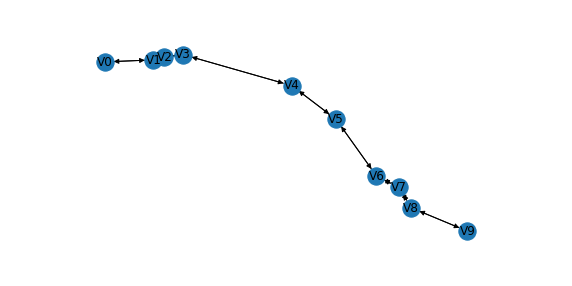

O grafo é acíclico, portanto a resposta da função deve ser:  True


In [19]:
ga = []

for i in range(10):
    ga.append(Vertice(nome=f"V{i}"))
    if i > 0:
        ga[i].adicionar_aresta_bidirecional(ga[i-1], random.randint(10, 100))
        
plota_grafo_layout_graphviz(ga)
print("O grafo é acíclico, portanto a resposta da função deve ser: ", grafo_aciclico(ga))

Podemos ter também, grafos com arestas unidirecionais. Neste caso, devemos considerar as direções das arestas para determinar a existência dos ciclos.

Vejamos o seguinte grafo.

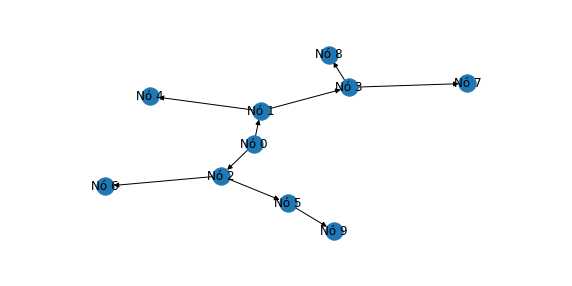

O grafo é acíclico (árvore binária), portanto a resposta da função deve ser:  True


In [20]:
gua = []
for i in range(10):
    gua.append(Vertice(nome=f"Nó {i}"))
gua[0].adicionar_aresta_unidirecional(gua[1], 10)
gua[0].adicionar_aresta_unidirecional(gua[2], 10)
gua[1].adicionar_aresta_unidirecional(gua[3], 10)
gua[1].adicionar_aresta_unidirecional(gua[4], 10)
gua[2].adicionar_aresta_unidirecional(gua[5], 10)
gua[2].adicionar_aresta_unidirecional(gua[6], 10)
gua[3].adicionar_aresta_unidirecional(gua[7], 10)
gua[3].adicionar_aresta_unidirecional(gua[8], 10)
gua[5].adicionar_aresta_unidirecional(gua[9], 10)

plota_grafo_layout_graphviz(gua)
print("O grafo é acíclico (árvore binária), portanto a resposta da função deve ser: ", grafo_aciclico(gua))

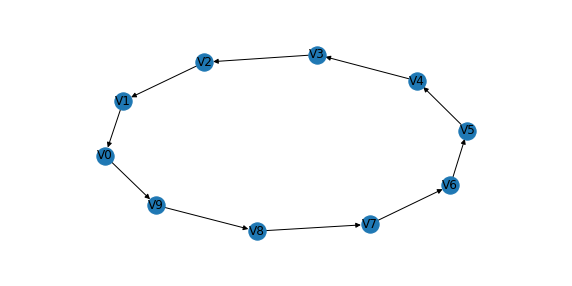

O grafo não é acíclico (anel), portanto a resposta da função deve ser:  False


In [21]:
gu = []
for i in range(10):
    gu.append(Vertice(nome=f"V{i}"))
for i in range(10):
    gu[i].adicionar_aresta_unidirecional(gu[i-1], 10)

plota_grafo_layout_graphviz(gu)
print("O grafo não é acíclico (anel), portanto a resposta da função deve ser: ", grafo_aciclico(gu))

### Árvore de Espalhamento Mínimo (minimum spanning tree)

Existem diversas aplicações onde queremos não as rotas mais curtas entre dois nós, mas o grafo cujo o somatório dos pesos das arestas é mínimo.

Uma dessas aplicações é a trilha de circuitos elétricos em placas de circuitos (tipicamente de cobre), ou vias (tipicamente cobre ou ouro) ligando transistores em semicondutores (e.g. processadores, GPUs, etc).

In [22]:
grafo_base = []
for nome in ["a","b","c","d","e","f","g","h","i"]:
    grafo_base.append(Vertice(nome=nome))
for aresta in [("a", "b", 4),
               ("a", "h", 8),
               ("b", "h", 11),
               ("b", "c", 8),
               ("c", "i", 2),
               ("c", "d", 7),
               ("c", "f", 4),
               ("d", "e", 9),
               ("d", "f", 14),
               ("f", "g", 2),
               ("i", "g", 6),
               ("i", "h", 7),
               ("g", "h", 1),
              ]:
    offset_vertice_origem = ord(aresta[0])-ord("a")
    offset_vertice_destino = ord(aresta[1])-ord("a")
    grafo_base[offset_vertice_origem].adicionar_aresta_bidirecional(grafo_base[offset_vertice_destino], aresta[2])

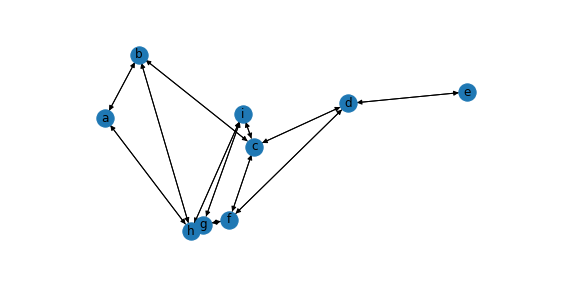

In [23]:
plota_grafo_layout_graphviz(grafo_base)

Podemos calcular o tamanho total do somatório das arestas recursivamente.

In [24]:
def tamanhoArestasDoGrafo(grafo: list):
    arestas_percorridas = {}
    for vertice in grafo:
        for (vertice_destino, peso) in vertice.arestas:
            arestas_percorridas[(vertice, vertice_destino)] = peso
    return sum(arestas_percorridas.values())/2 # Contando duas vezes por arestas serem bidirecionais

print("Comprimento total das arestas: ", tamanhoArestasDoGrafo(grafo_base))

Comprimento total das arestas:  83.0


Para encontrar o menor grafo que conecta todos os vértices, precisamos achar o sub-grafo com o menor somatório de arestas.

Usaremos o algoritmo de Kruskal para isso, que tenta conectar grafos disjuntos com a menor aresta possível.

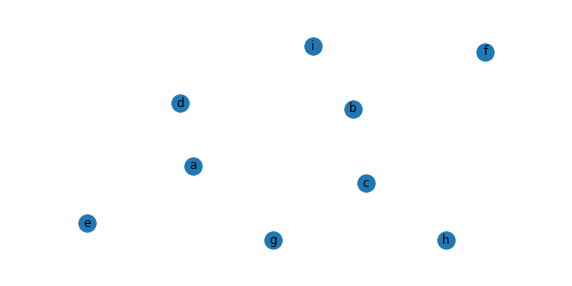

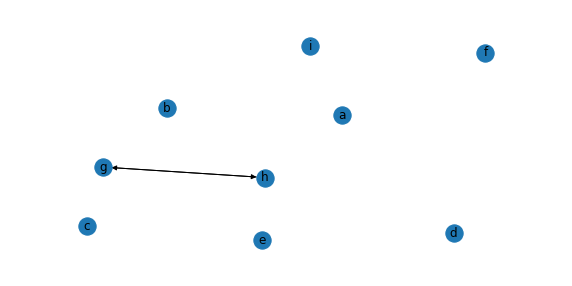

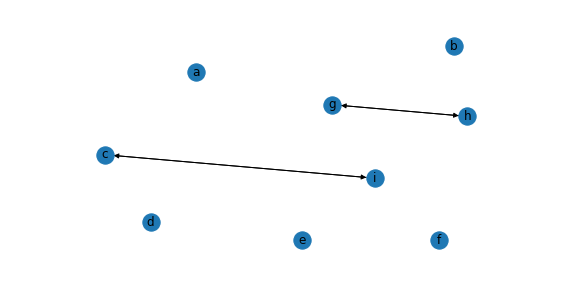

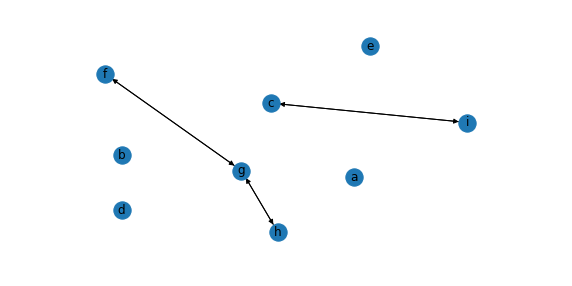

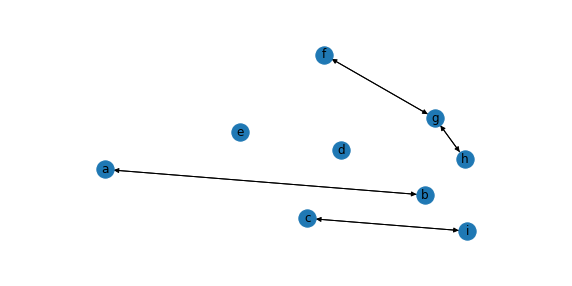

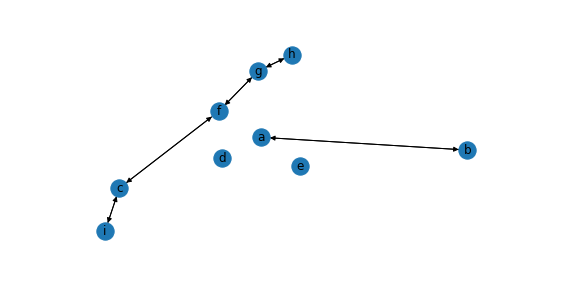

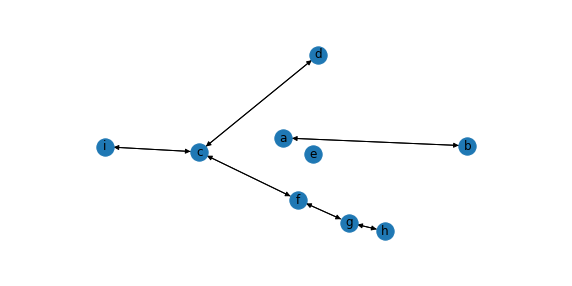

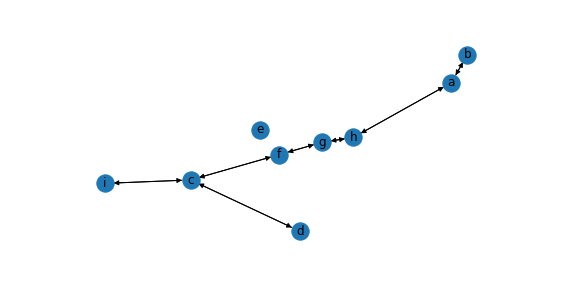

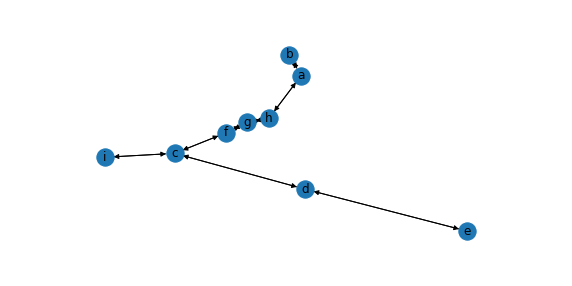

In [25]:
def buscaSubgrafoMinimo (grafo:list):
    # Remonta lista de vertices e arestas
    nos_arvore = {}
    arestas_grafo = []

    for vertice in grafo:
        nos_arvore[vertice.nome] = Vertice(nome=vertice.nome)
        for (vertice_destino, peso) in vertice.arestas:
            arestas_grafo.append((vertice.nome, vertice_destino.nome, peso))
            
    # No algoritmo de Kruskal, começamos com todos os nós
    # do subgrafo em uma lista. 
    nos_subgrafo_minimo = []

    # Em seguida, organizamos as arestas pelo menor peso
    arestas_grafo = list(sorted(arestas_grafo, key=lambda x: x[2]))
    
    # Plota estado inicial sem arestas
    plota_grafo_layout_graphviz(list(nos_arvore.values()))
    print("================================================================================")
    # Adiciona arestas necessárias
    for aresta in arestas_grafo:
        # Se ainda não houver um caminho ligando os nós, re-criamos a aresta os conectando
        _, rota = busca_rota_mais_curta(nos_arvore[aresta[0]], nos_arvore[aresta[1]])
        if rota is None:
            nos_arvore[aresta[0]].adicionar_aresta_bidirecional(nos_arvore[aresta[1]], aresta[2])
            plota_grafo_layout_graphviz(list(nos_arvore.values()))
            print("================================================================================")

    return list(nos_arvore.values())
        

subgrafo_minimo = buscaSubgrafoMinimo(grafo_base)

Comprimento total das arestas:  37.0


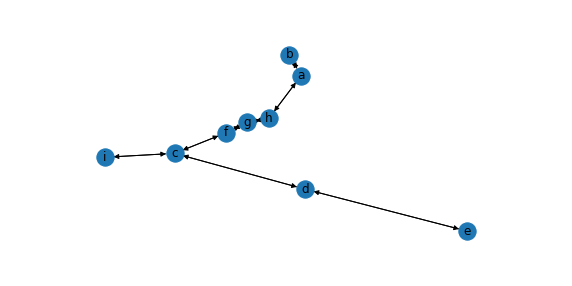

In [26]:
print("Comprimento total das arestas: ", tamanhoArestasDoGrafo(subgrafo_minimo))
plota_grafo_layout_graphviz(subgrafo_minimo)

## Exemplos de casos de uso

### Coloração de grafos para alocação de recursos escassos

Um dos casos de uso mais comuns é a atividade de coloração de grafos.

A coloração de grafos é feita de maneira a se reduzir o número de "cores" necessárias para se pintar um grafo, de maneira que nenhum vértice adjacente tenha a mesma cor de seus vizinhos.

O número de cores é tipicamente utilizado para representar um número de recursos limitados, por exemplo, registradores utilizado nos processadores quando executamos instruções de máquina, ou então frequências de rádio para telefonia móvel.

Detalhes sobre arquitetura Intel/AMD (x86 e x86_64): https://www.cs.virginia.edu/~evans/cs216/guides/x86.html

Detalhes sobre bandas de radiofrequência: https://www.gov.br/anatel/pt-br/regulado/radiofrequencia/atribuicao-destinacao-e-distribuicao-de-faixas

#### Alocação de registradores

A alocação de registradores é feita tipicamente por compiladores que transformam um programa em código-fonte em linguagem de máquina para a arquitetura de destino.

A alocação se faz necessária, já que o número de registradores disponíveis para o programador pela arquitetura são limitados, e a reutilização de um mesmo registrador de maneira sequencial pelo programa piora o desempenho do mesmo.

Dois dos compiladores mais comuns, GCC e Clang, usaram a coloração de grafos para otimizar a alocação dos registradores.

Mais informações em:

https://gcc.gnu.org/wiki/RegisterAllocation

https://gcc.gnu.org/pub/gcc/summit/2003/Graph%20Coloring%20Register%20Allocation.pdf

https://www.llvm.org/devmtg/2011-11/Olesen_RegisterAllocation.pdf

https://github.com/johnflanigan/graph-coloring-via-register-allocation

#### Alocação e reuso de bandas de frequência de telefonia

Recentemente, a Anatel (agência responsável pelo espectro) tomou da Vivo duas licensas para operação por dez anos em bandas de 5MHz (totalizando 10MHz), avaliadas em 5.7 bilhões de reais. https://teletime.com.br/09/12/2022/anatel-rejeita-argumentos-da-vivo-e-extingue-licenca-da-faixa-de-450-mhz/

Operadoras de telefonia se estapeiam e pagam fortunas for bandas de rádio frequência, porque são elas que permitem que as operadoras prestem seu serviço de telefonia móvel (cujo retorno é maior que telefonia fixa e internet). Caso uma operadora não compre banda suficiente, será menos competitiva com outras operadoras e o desempenho da rede cairá mais rapidamente conforme o número de usuários da rede (banda é dividida entre os usuários).

Imagine uma cidade coberta pelas torres abaixo. 

Se utilizarmos uma única frequência, teremos interferência entre as torres e precisaremos baixar a potência de transmissão, que reduzirá também a área de cobertura, requerindo mais torres.

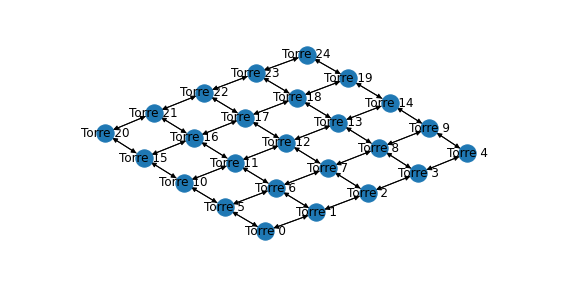

In [27]:
gt = []
for i in range(25):
    gt.append(Vertice(nome=f"Torre {i}"))
for i in range(25):
    if i % 5 != 4:
        gt[i].adicionar_aresta_bidirecional(gt[i+1], 10)
    if i // 5 != 4:
        gt[i].adicionar_aresta_bidirecional(gt[i+5], 10)

plota_grafo_layout_graphviz(gt)

Para minimizar os custos, as operadoras utilizam técnicas de otimização, como a coloração de grafos, para reutilizar bandas tanto quanto possível. Faremos o processo a seguir.

================Coloração inicial===============
Numero de cores inicial: 25


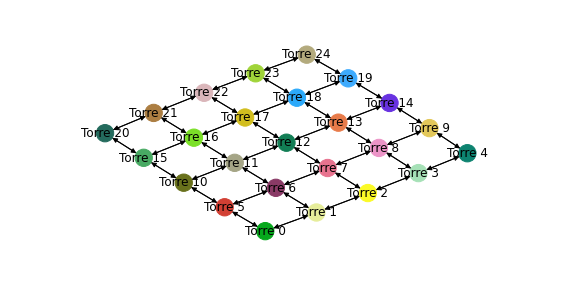

================Coloração final=================
Numero de cores final: 2


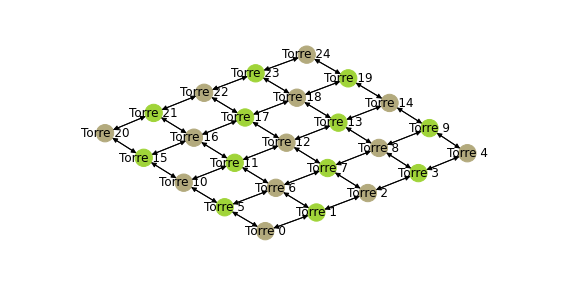

In [28]:
def colore_grafo(grafo: list):
    def gera_cor():
        return random.random(), random.random(), random.random()
    # Geramos uma cor por vértices e pintamos o grafo
    cores = [gera_cor() for _ in range(len(grafo))]

    cor_para_vertice = {}
    for i, vertice in enumerate(grafo):
        vertice.cor = cores[i]
        cor_para_vertice[vertice.cor] = [vertice]
        
    print("================Coloração inicial===============")
    print("Numero de cores inicial:", len(cores))
    plota_grafo_layout_graphviz(grafo, cores)
    print("================================================")
    
    def cor_vizinhos(vertice: Vertice):
        cores = []
        for (verticeVizinho, _ ) in vertice.arestas:
            cores.append(verticeVizinho.cor)
        return cores
    
    # Vamos substituir cores pouco frequentes (se possível)
    while True:
        numero_cores_original = len(cor_para_vertice)
        frequencia_cores = list(sorted(cor_para_vertice.items(), key=lambda x: len(x[1])))
        frequencia_cores_decrescente = list(sorted(cor_para_vertice.items(), key=lambda x: len(x[1]), reverse=True))
        for cor, vertices in frequencia_cores:
            for vertice in vertices:
                for (cor_frequente, _) in frequencia_cores_decrescente:
                    # se cor não for usada em um vizinho e a nova
                    # cor diferir da do vértice atual, substitui
                    if cor_frequente not in cor_vizinhos(vertice) and vertice.cor != cor_frequente:
                        cor_para_vertice[vertice.cor].remove(vertice)
                        vertice.cor = cor_frequente
                        cor_para_vertice[vertice.cor].append(vertice)
                    pass
                pass
            pass
        # Limpa cores inutilizadas
        for cor in list(cor_para_vertice):
            if len(cor_para_vertice[cor]) == 0:
                del cor_para_vertice[cor]
        novo_tamanho_cores = len(cor_para_vertice)
        # Se não houver mudança no número de cores,
        # provavelmente chegamos ao final
        if numero_cores_original == novo_tamanho_cores:
            break

    # Coleta coloração final
    cores = []
    for vertice in grafo:
        cores.append(vertice.cor)
    print("================Coloração final=================")
    print("Numero de cores final:", len(set(cores)))
    plota_grafo_layout_graphviz(grafo, cores)
    print("================================================")

colore_grafo(gt)

Como é possível se observar, o número de cores caiu drasticamente de 25 para 2. Isto geraria uma redução considerável de custos para a companhia, que no cenário original provavelmente não seria viável economicamente.

### Menor caminho entre dois pontos usando heurísticas (A*/A-Star)

#### Decidir trajeto de unidades em jogos

Grafos também podem ser utilizados em jogos, para a definição do caminho de caminhada de unidades do jogo.

Um dos algoritmos classicos para isto é o A* (A-star, ou A-estrela). Este algoritmo usa uma combinação de busca em largura com heurísticas para direcionar a busca.

Heurística nada mais é do que tirar proveito do conhecimento do domínio da aplicação para fazer escolhas mais naturais.

No tabuleiro abaixo, por exemplo, sabemos que só podemos nos movimentar em linhas e colunas. Sabemos também que o objetivo está na célula 81. Com base nisto, sabemos que buscar um caminho mais distante de 81 é potencialmente desperdício de tempo.

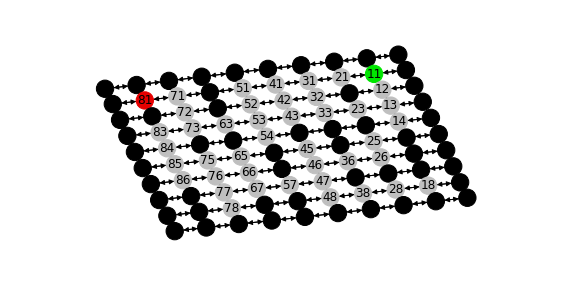

In [29]:
def gera_tabuleiro(plota_tabuleiro=False):
    gastar = []
    for i in range(100):
        gastar.append(Vertice(nome=f"{i}"))

    for i in range(100):
        if i % 10 != 9:
            gastar[i].adicionar_aresta_bidirecional(gastar[i+1], 10)
        if i // 10 != 9:
            gastar[i].adicionar_aresta_bidirecional(gastar[i+10],10)
        # Bordas do mapa
        if i % 10 == 0 or i % 10 == 9 or i // 10 == 0 or i // 10 == 9:
            gastar[i].cor = (0,0,0)
        else:
            gastar[i].cor = (0.75, 0.75, 0.75)

    # Ponto de partida
    gastar[11].cor = (  0, 0.9, 0)
    # Paredes
    for linha in range(10, 100, 10):
        for i in [random.randrange(0, 10)+linha for _ in range(random.randint(3,6))]:
            if i not in [11, 81]:
                gastar[i].cor = (0,0,0)
    # Ponto de chegada
    gastar[81].cor = (0.9,   0, 0)

    cores = []
    for vertice in gastar:
        cores.append(vertice.cor)
    if plota_tabuleiro:
        plota_grafo_layout_graphviz(gastar, cores)
    return gastar

tabuleiro = gera_tabuleiro(plota_tabuleiro=True)

Podemos implementar o A-Star da seguinte maneira:

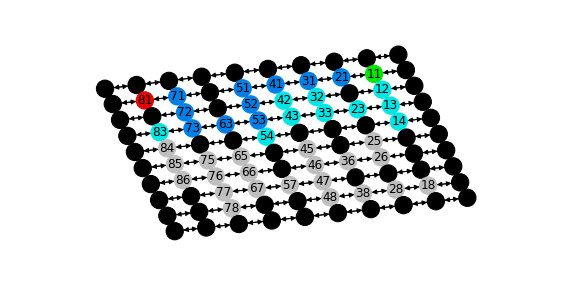

Tem solução


In [30]:
def busca_rota_mais_curta_a_star (vertice_partida, vertice_destino, colorir_explorado=False):
    # Esta não é uma função recursiva
    # Guardaremos um dicionário contendo as rotas da raiz até o nó
    caminhos = { vertice_partida.nome : []}
    vertices_visitados = [vertice_partida]

    def calcula_peso_caminho(vertices):
        peso_caminho = 0
        for i, vertice in enumerate(vertices[:-1]):
            proximo_vertice, peso = list(filter(lambda x: x[0] == vertices[i+1], vertice.arestas))[0]
            peso_caminho += peso
        return peso_caminho

    def distancia_euclidiana(nomeVertice):
        # X = dezena
        # Y = unidade
        val1 = int(nomeVertice)
        x1 = val1 // 10
        y1 = val1 % 10

        val2 = int(vertice_destino.nome)
        x2 = val2 // 10
        y2 = val2 % 10

        return ((x2-x1)**2 + (y2-y1)**2)**0.5

    # Enquanto houverem nós ainda não visitados, os visite
    while len(vertices_visitados) > 0:
        # Para cada novo vértice, existe um caminho desde
        # o vértice de partida que já foi explorado
        novo_caminho = list(caminhos[vertices_visitados[0].nome])
        # e que é acrescido do vértice atual
        novo_caminho += [vertices_visitados[0]]

        if colorir_explorado:
            if vertices_visitados[0].nome not in ["11", "81"]:
                vertices_visitados[0].cor = (0, 0.9, 0.9)
        
        # Em seguida, se exploram seus vizinhos
        # Heuristica 1: ordene nós pela distância até o vertice destino
        arestas_ordenadas_por_distancia = sorted(vertices_visitados[0].arestas, key=lambda x: distancia_euclidiana(x[0].nome))
        for (vizinho, peso) in arestas_ordenadas_por_distancia:
            # Pela regra do jogo, não podemos explorar vértices pretos (paredes)
            if vizinho.cor == (0,0,0):
                continue
            if vizinho.nome not in caminhos:
                # O caminho até cada um dos vizinhos é guardado
                caminhos[vizinho.nome] = novo_caminho
                vertices_visitados.append(vizinho)
                # Heuristica 2: interrompa a busca assim que achar nosso destino
                if vizinho == vertice_destino:
                    vertices_visitados = [None]
                    break
            else:
                # Se o vizinho já foi explorado, o caminho até a raíz
                # só pode ser trocado caso o novo caminho seja menor que o conhecido
                if calcula_peso_caminho(novo_caminho) < calcula_peso_caminho(caminhos[vizinho.nome]):
                    caminhos[vizinho.nome] = novo_caminho
        # Ao final de cada visita aos vértices, eles são retirados da fila
        # e seus vizinhos são então explorados
        vertices_visitados.pop(0)
    # Caso haja um caminho até o nó de destino, acrescente
    # o nó de destino e calcule a distância até a raiz
    if vertice_destino.nome in caminhos:
        caminhos[vertice_destino.nome].append(vertice_destino)
        return calcula_peso_caminho(caminhos[vertice_destino.nome]), \
            list(map(lambda x: x.nome, caminhos[vertice_destino.nome]))
    else:
        # Caso não existe, retorne uma distância absurda e nenhum caminho
        return 99999999999999, None

    
distancia, rota = busca_rota_mais_curta_a_star(tabuleiro[11], tabuleiro[81], colorir_explorado=True)

if rota:
    cores = []
    for vertice in tabuleiro:
        if vertice.nome in rota[1:-1]:
            vertice.cor = (0, 0.5, 0.9)
        cores.append(vertice.cor)
    plota_grafo_layout_graphviz(tabuleiro, cores)
    print("Tem solução")
else:
    print("Não tem solução")

Podemos fazer mais algumas vezes:

========================INICIO DO JOGO======================


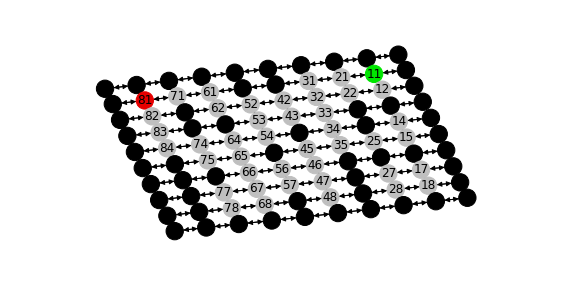

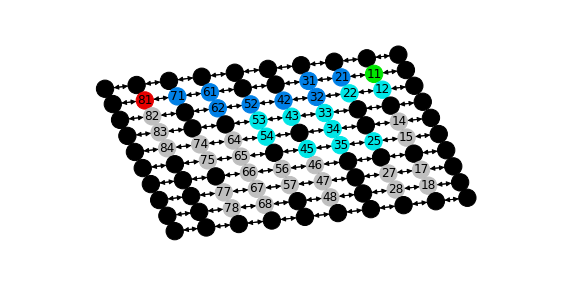

Tem solução
========================FIM DO JOGO==========================


In [31]:
def jogo(colorir_explorado=False):
    print("========================INICIO DO JOGO======================")
    tabuleiro = gera_tabuleiro(plota_tabuleiro=True)
    distancia, rota = busca_rota_mais_curta_a_star(tabuleiro[11], tabuleiro[81], colorir_explorado=colorir_explorado)

    cores = []
    for vertice in tabuleiro:
        if rota:
            if vertice.nome in rota[1:-1]:
                vertice.cor = (0, 0.5, 0.9)
        cores.append(vertice.cor)
    plota_grafo_layout_graphviz(tabuleiro, cores)
    if rota:
        print("Tem solução")
    else:
        print("Não tem solução")
    print("========================FIM DO JOGO==========================")
jogo(True)

========================INICIO DO JOGO======================


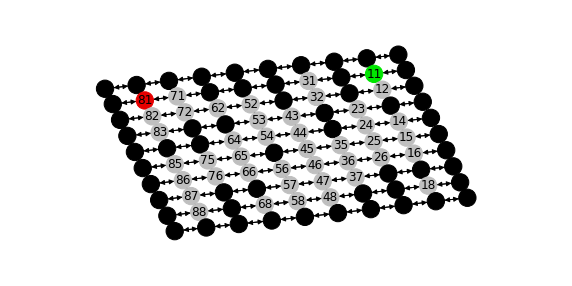

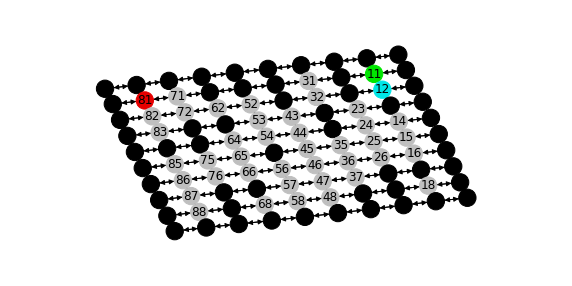

Não tem solução
========================FIM DO JOGO==========================


In [32]:
jogo(True)

========================INICIO DO JOGO======================


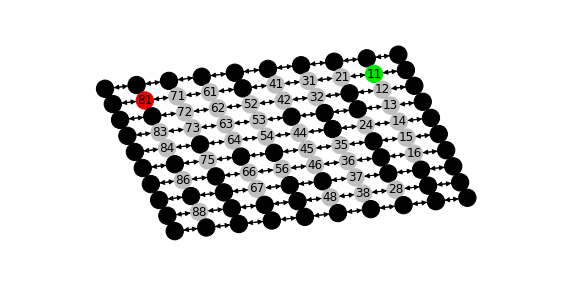

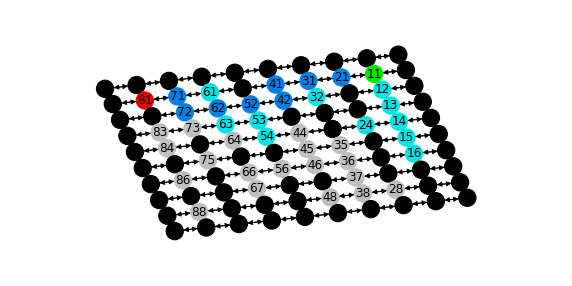

Tem solução
========================FIM DO JOGO==========================


In [39]:
jogo(True)

# TODO

### Menor caminho entre quaisqueir dois pontos (Dijkstra)

#### Roteamento de pacotes de rede



#### Caixeiro viajante